The source of the algorithm is inside several .py files. Accessing through bovw's run method we can configure the execution in order to iterate over the desired parameters. If a parameter has exactly one value, only that will be use. If it has tree, a np.linspace will be created with them.

In [1]:
from bovw import run

We use the following default method to run the experiments.

In [2]:
from argparse import Namespace
import numpy as np
from matplotlib import pyplot as plt

def run_experiment(method=('sift',), n_features=(300,), step_size=(16,), n_clusters=(128,), n_neighbors=(5,), 
                   distance=('euclidean',), confusion_matrix=False):
    args = Namespace(train_path='../data/MIT_split/train',
                     test_path='../data/MIT_split/test',
                     method=method,
                     n_features=n_features,
                     step_size=step_size,
                     n_clusters=n_clusters,
                     n_neighbors=n_neighbors,
                     distance=distance,
                     confusion_matrix=confusion_matrix)
    return run(args)

#### Test different amounts of local features using SIFT
If we don't have enough features the results will be bad but if we have too many the computational time will increase too much. We should find a compromise between both.

method: sift, n_features: 100, step_size: 16
extract train descriptors: 18.603552s
extract test descriptors: 7.599567s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 4.197656s
test: 0.610805s
method: sift, n_features: 200, step_size: 16
extract train descriptors: 22.811687s
extract test descriptors: 11.511326s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 6.533908s
test: 0.802732s
method: sift, n_features: 300, step_size: 16
extract train descriptors: 28.114998s
extract test descriptors: 14.967225s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.782188s
test: 0.902711s
method: sift, n_features: 400, step_size: 16
extract train descriptors: 31.633871s
extract test descriptors: 15.348086s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 11.097447s
test: 1.025672s
method: sift, n_features: 500, step_size: 16
extract train descriptors: 32.590565s
extract test descriptors: 14.013513s
n_clusters: 128, n_neighbors: 5, distance: euclidean
tra

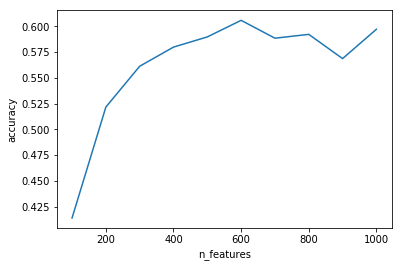

In [3]:
results = run_experiment(n_features=[100, 1000, 10])
plt.plot(results['n_features'], results['accuracy'])
plt.xlabel('n_features')
plt.ylabel('accuracy')
plt.show()

The accuracy from 500 features onwards is more or less constant. So a value between 500 and 600 should work properly.

#### SIFT vs DenseSIFT
Dense SIFT consists in running SIFT on a dense gird of locations at a fixed scale and orientation. This kind of descriptors have proven to yield better results for image classification tasks.

method: sift, n_features: 300, step_size: 16
extract train descriptors: 23.767440s
extract test descriptors: 13.591648s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.685219s
test: 0.877719s
method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 266.740584s
extract test descriptors: 114.751260s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 6.864801s
test: 0.856726s


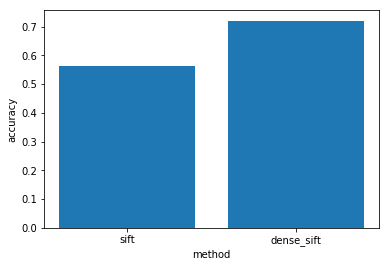

In [4]:
results = run_experiment(method=['sift', 'dense_sift'])
x = np.arange(2)
plt.bar(x, results['accuracy'])
plt.xticks(x, results['method'])
plt.xlabel('method')
plt.ylabel('accuracy')
plt.show()

In the graph above, we can crearly observe how `dense_sift` outperforms `sift`.

#### Test different amounts of codebook sizes k

method: sift, n_features: 300, step_size: 16
extract train descriptors: 22.226885s
extract test descriptors: 13.105830s
n_clusters: 80, n_neighbors: 5, distance: euclidean
train: 5.007398s
test: 0.777766s
n_clusters: 93, n_neighbors: 5, distance: euclidean
train: 6.300995s
test: 0.830722s
n_clusters: 106, n_neighbors: 5, distance: euclidean
train: 6.318977s
test: 0.841731s
n_clusters: 120, n_neighbors: 5, distance: euclidean
train: 7.458624s
test: 0.880706s
n_clusters: 133, n_neighbors: 5, distance: euclidean
train: 8.908149s
test: 0.901711s
n_clusters: 146, n_neighbors: 5, distance: euclidean
train: 9.383008s
test: 0.922693s
n_clusters: 160, n_neighbors: 5, distance: euclidean
train: 9.914825s
test: 0.962689s
n_clusters: 173, n_neighbors: 5, distance: euclidean
train: 11.419344s
test: 0.985684s
n_clusters: 186, n_neighbors: 5, distance: euclidean
train: 11.439354s
test: 1.000668s
n_clusters: 200, n_neighbors: 5, distance: euclidean
train: 11.865213s
test: 1.019661s
n_clusters: 213, n_

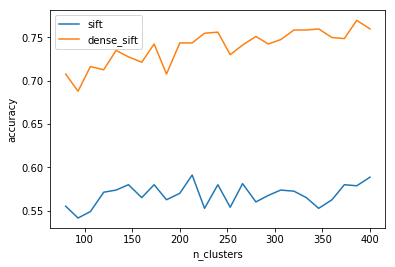

In [5]:
results = run_experiment(method=['sift', 'dense_sift'], n_clusters=[80, 400, 25])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_clusters'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_clusters'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_clusters')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

#### Test different values of k for the k-nn classifier

method: sift, n_features: 300, step_size: 16
extract train descriptors: 23.189575s
extract test descriptors: 13.501677s
n_clusters: 128, n_neighbors: 3, distance: euclidean
train: 8.619252s
test: 0.883705s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.630244s
test: 0.883710s
n_clusters: 128, n_neighbors: 7, distance: euclidean
train: 8.611255s
test: 0.880706s
n_clusters: 128, n_neighbors: 9, distance: euclidean
train: 8.611243s
test: 0.881718s
n_clusters: 128, n_neighbors: 11, distance: euclidean
train: 8.864162s
test: 0.878719s
n_clusters: 128, n_neighbors: 13, distance: euclidean
train: 8.637235s
test: 0.886715s
n_clusters: 128, n_neighbors: 15, distance: euclidean
train: 8.653241s
test: 0.887704s
n_clusters: 128, n_neighbors: 17, distance: euclidean
train: 8.632248s
test: 0.884705s
n_clusters: 128, n_neighbors: 19, distance: euclidean
train: 8.590262s
test: 0.885705s
n_clusters: 128, n_neighbors: 21, distance: euclidean
train: 8.578270s
test: 0.873704s
method: dense_

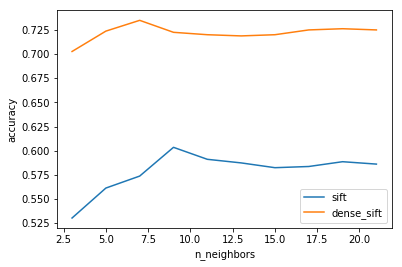

In [6]:
results = run_experiment(method=['sift', 'dense_sift'], n_neighbors=[3, 21, 10])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
plt.plot(results_sift['n_neighbors'], results_sift['accuracy'], label='sift')
plt.plot(results_dense_sift['n_neighbors'], results_dense_sift['accuracy'], label='dense_sift')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

The number of neighbors must be at least 10 to provide good enough results.

#### Test different distances for the k-nn classifier

method: sift, n_features: 300, step_size: 16
extract train descriptors: 23.339546s
extract test descriptors: 13.893518s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 8.664235s
test: 0.887704s
n_clusters: 128, n_neighbors: 5, distance: manhattan
train: 8.539265s
test: 0.874720s
n_clusters: 128, n_neighbors: 5, distance: chebyshev
train: 8.581252s
test: 0.886717s
method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 262.755537s
extract test descriptors: 113.293726s
n_clusters: 128, n_neighbors: 5, distance: euclidean
train: 7.338650s
test: 0.866723s
n_clusters: 128, n_neighbors: 5, distance: manhattan
train: 7.345648s
test: 0.863724s
n_clusters: 128, n_neighbors: 5, distance: chebyshev
train: 7.385647s
test: 0.866723s


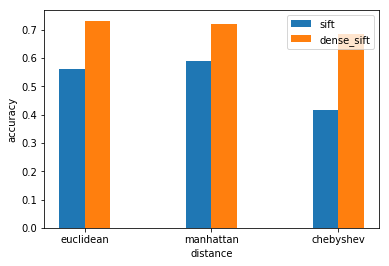

In [7]:
results = run_experiment(method=['sift', 'dense_sift'], distance=['euclidean', 'manhattan', 'chebyshev'])
results_sift = results.loc[results['method'] == 'sift']
results_dense_sift = results.loc[results['method'] == 'dense_sift']
x = np.arange(3)
plt.bar(x-0.1, results_sift['accuracy'], width=0.2, align='center', label='sift')
plt.bar(x+0.1, results_dense_sift['accuracy'], width=0.2, align='center', label='dense_sift')
plt.xticks(x, ['euclidean', 'manhattan', 'chebyshev'])
plt.xlabel('distance')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

The euclidean distance is clearly the best performing one.

#### Confusion matrix
Finally, we plot the confusion matrix of the best combination of hyperparameters.

method: dense_sift, n_features: 300, step_size: 16
extract train descriptors: 259.738837s
extract test descriptors: 112.046126s
n_clusters: 250, n_neighbors: 11, distance: euclidean
train: 14.355415s
test: 1.157670s


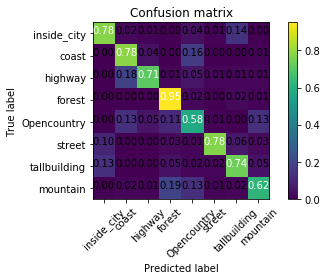

,method,distance,n_features,step_size,n_clusters,n_neighbors,accuracy
0,dense_sift,euclidean,300,16,250,11,0.737299


In [8]:
run_experiment(method=['dense_sift'], n_clusters=[250], n_neighbors=[11], distance=['euclidean'], confusion_matrix=True)